Этот набор данных создан для прогнозирования приема выпускников с индийской точки зрения, основан на наборе данных выпускников UCLA.Этот набор данных был создан с целью помочь студентам в списках университетов с их профилями. Прогнозируемый результат дает им четкое представление об их шансах для конкретного университета.

Cодержание
Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на магистерские программы. Параметры включают в себя: 
1. Оценки GRE (из 340) 
2. Оценки TOEFL (из 120) 
3. Университетский рейтинг (из 5) 
4. Заявление о цели и рекомендательное письмо (из 5) 
5. Бакалавриат Средний балл (из 10) 
6. Опыт исследования (0 или 1) 
7. Вероятность поступления (от 0 до 1)


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [47]:
#Импорт данных
data = pd.read_csv('D:\Prog\ML\LR1\Data\Admission_Predict_Ver1.1.csv', sep=",")

In [48]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
#Размер датасета - 500 строк, 9 колонок
data.shape

(500, 9)

In [50]:
# Список колонок
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [51]:
# Проверим наличие пустых значений (их нет)
# Цикл по колонкам датасета
for col in data.columns[1:None]:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [52]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [56]:
#Пока целевой признак не известен
# Определим уникальные значения для целевого признака
data['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

1.Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

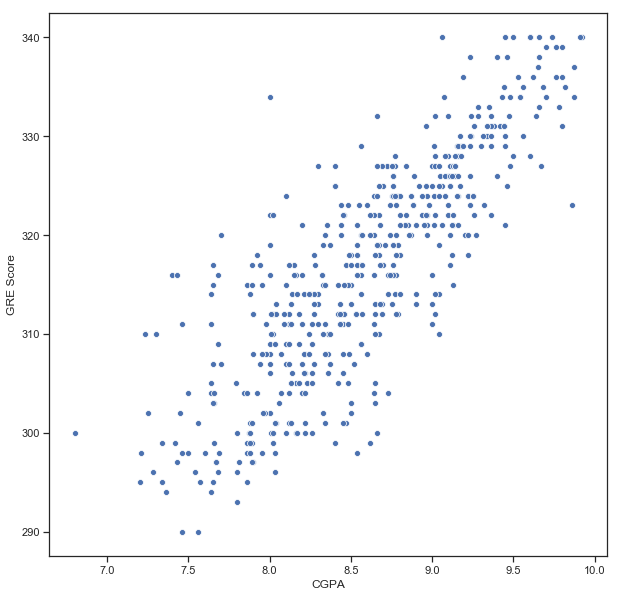

In [73]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CGPA', y='GRE Score', data=data)

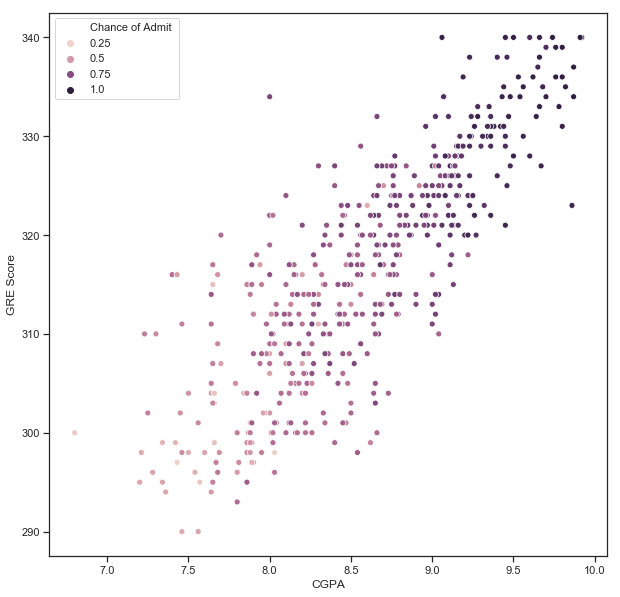

In [57]:
#Влияние целевого признака
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='CGPA', y='GRE Score', data=data, hue='Chance of Admit')

Гистограмма
Позволяет оценить плотность вероятности распределения данных.

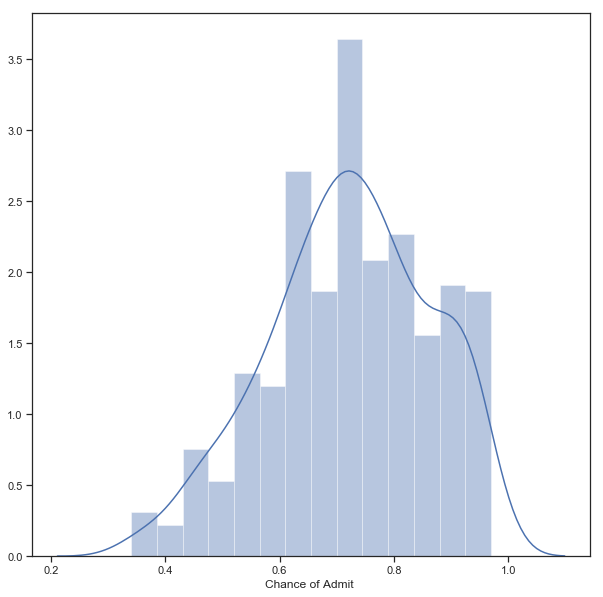

In [59]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Chance of Admit '])

Jointplot
Комбинация гистограмм и диаграмм рассеивания.

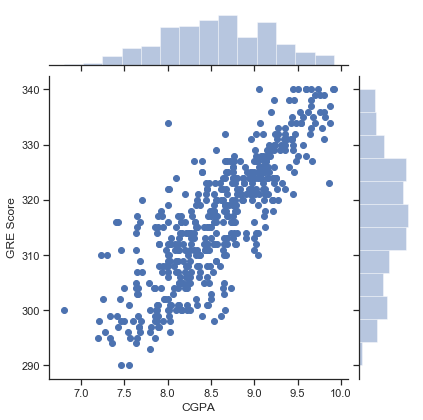

In [61]:
sns.jointplot(x='CGPA', y='GRE Score', data=data)

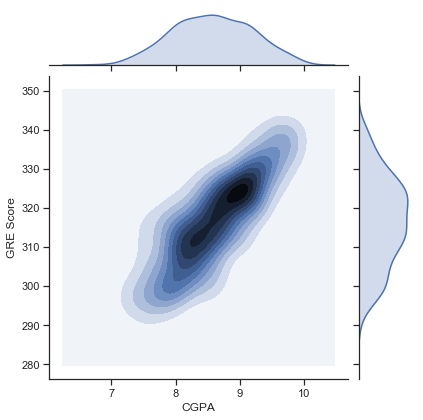

In [63]:
sns.jointplot(x='CGPA', y='GRE Score', data=data, kind="kde")

"Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

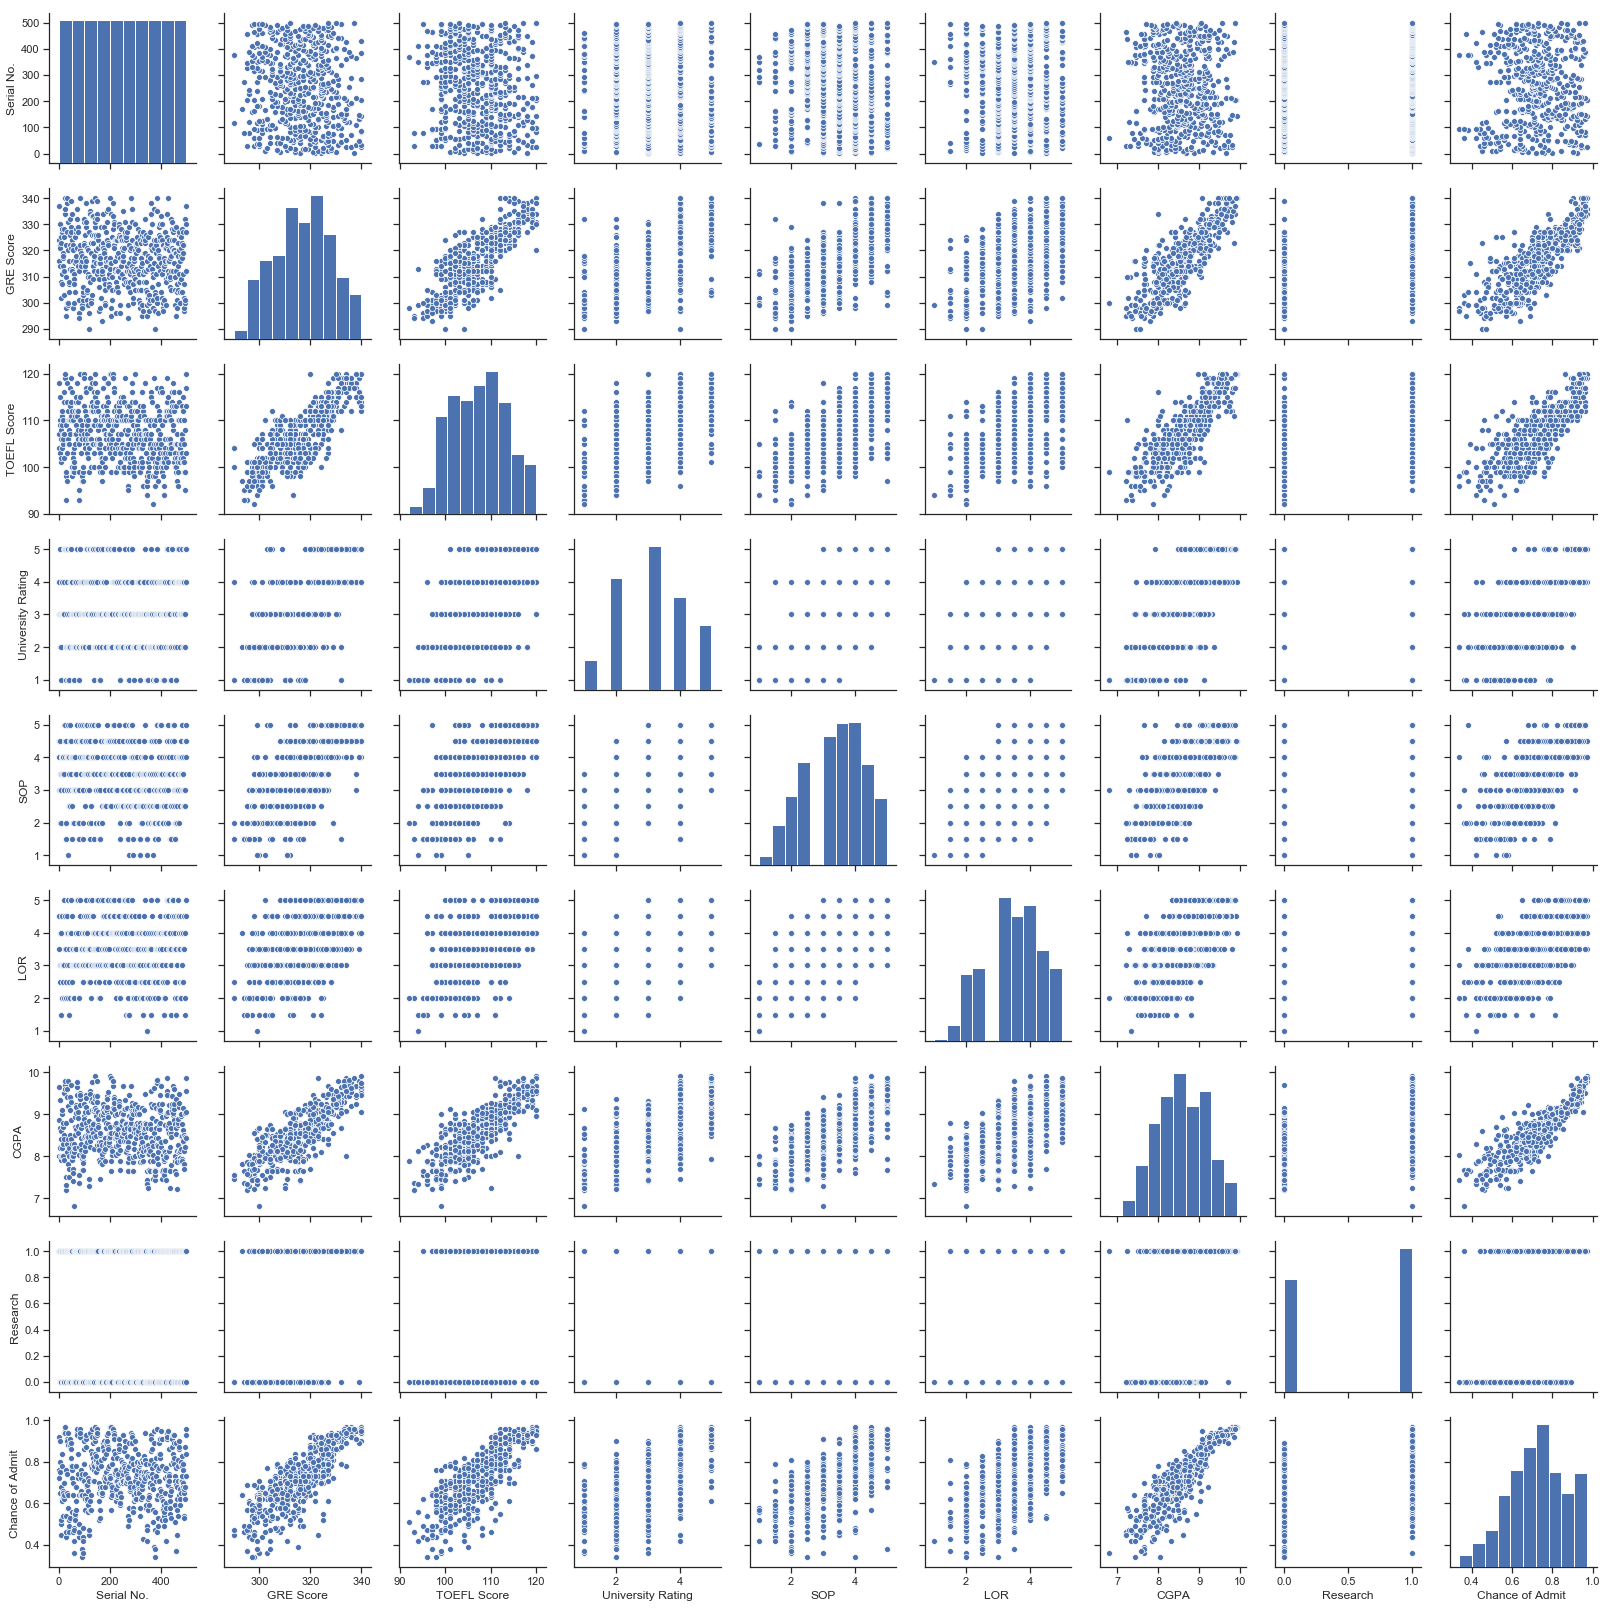

In [66]:
sns.pairplot(data)

Ящик с усами
Отображает одномерное распределение вероятности.

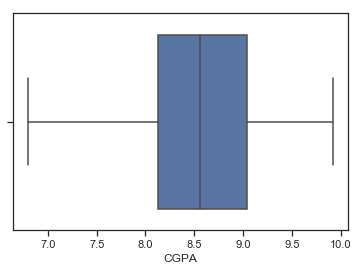

In [69]:
sns.boxplot(x=data['CGPA'])

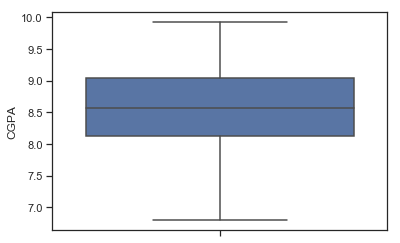

In [70]:
sns.boxplot(y=data['CGPA'])

Violin plot

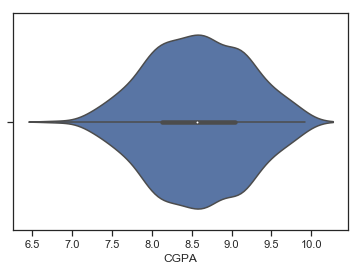

In [71]:
sns.violinplot(x=data['CGPA'])

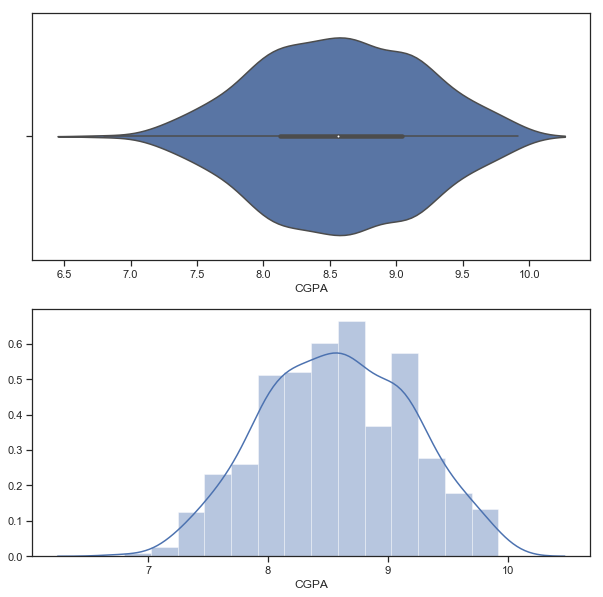

In [72]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['CGPA'])
sns.distplot(data['CGPA'], ax=ax[1])

Информация о корреляции признаков

In [76]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [77]:
data.corr(method='pearson')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [78]:
data.corr(method='kendall')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.068496,-0.098656,-0.040534,-0.101583,0.002344,-0.053469,-0.004358,-0.005993
GRE Score,-0.068496,1.000000,0.655920,0.514842,0.475974,0.386159,0.651313,0.478379,0.647169
TOEFL Score,-0.098656,0.655920,1.000000,0.520345,0.504574,0.403507,0.635410,0.396523,0.622481
University Rating,-0.040534,0.514842,0.520345,1.000000,0.624569,0.497402,0.565745,0.394370,0.570844
SOP,-0.101583,0.475974,0.504574,0.624569,1.000000,0.535641,0.558255,0.355953,0.552719
LOR,0.002344,0.386159,0.403507,0.497402,0.535641,1.000000,0.485466,0.328867,0.494280
CGPA,-0.053469,0.651313,0.635410,0.565745,0.558255,0.485466,1.000000,0.417418,0.731828
Research,-0.004358,0.478379,0.396523,0.394370,0.355953,0.328867,0.417418,1.000000,0.467002
Chance of Admit,-0.005993,0.647169,0.622481,0.570844,0.552719,0.494280,0.731828,0.467002,1.000000


In [79]:
data.corr(method='spearman')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.099592,-0.142607,-0.055424,-0.144249,0.004220,-0.075126,-0.005332,-0.001733
GRE Score,-0.099592,1.000000,0.823853,0.643423,0.620688,0.514352,0.829251,0.578487,0.822201
TOEFL Score,-0.142607,0.823853,1.000000,0.645533,0.644715,0.523434,0.809485,0.474540,0.793634
University Rating,-0.055424,0.643423,0.645533,1.000000,0.729399,0.602319,0.703333,0.435351,0.703742
SOP,-0.144249,0.620688,0.644715,0.729399,1.000000,0.662653,0.717384,0.409088,0.702799
LOR,0.004220,0.514352,0.523434,0.602319,0.662653,1.000000,0.639563,0.376166,0.643627
CGPA,-0.075126,0.829251,0.809485,0.703333,0.717384,0.639563,1.000000,0.509264,0.888786
Research,-0.005332,0.578487,0.474540,0.435351,0.409088,0.376166,0.509264,1.000000,0.565715
Chance of Admit,-0.001733,0.822201,0.793634,0.703742,0.702799,0.643627,0.888786,0.565715,1.000000


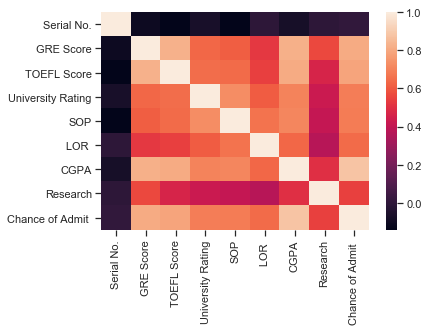

In [80]:
sns.heatmap(data.corr())

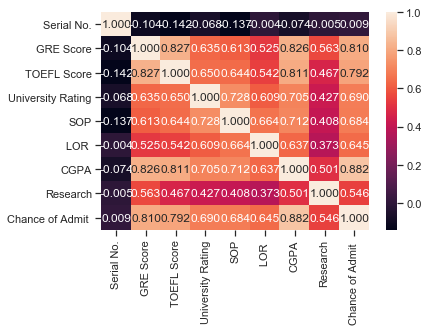

In [81]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

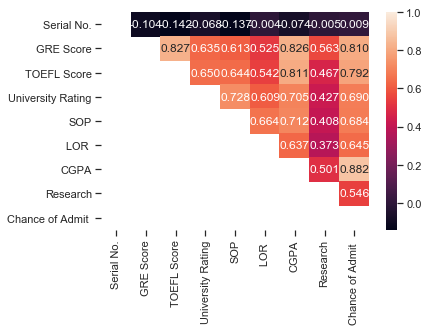

In [82]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

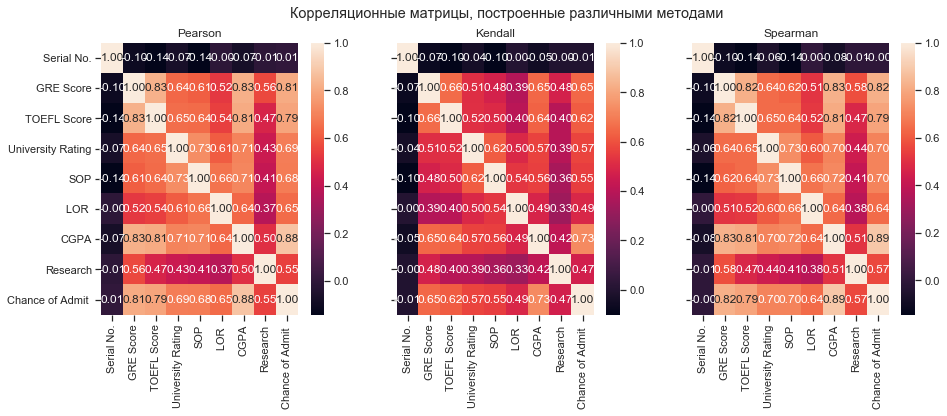

In [83]:

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')